In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
mpl.rc("savefig", dpi=200)


data = pd.read_csv('../data/yeast.csv', header=None).values
df_all = pd.read_csv('../data/fittedVals.csv',index_col=0)


df_labels = df_all.columns
df_labels = list(map(lambda s: s.replace("_ct_bin",""), df_all.columns))
df_labels = list(map(lambda s: s.replace("_mode",""), df_labels))
df_all.columns = df_labels

df_all=df_all[['hairtype','service','ethnicity','breastappearance',
               'build','haircolor','fellatio','intercoursevaginal',
               'kissing','cunninlingus','massage','manualpenilestimulation',
               'manualvaginalstimulation','testiclestimulation','cuddling',
               'ejaculationonbody','intercourseanal','analoral','manualanalstimulation',
               'threesome','sm']]





data = df_all.values
from kmeans.utilities import generate_random_subset
data = generate_random_subset(data,10000)[1]

In [2]:
import time
from sklearn.cluster import KMeans

start = time.time()
stock = KMeans(n_clusters=3,n_init=10000,max_iter=100)
stock.fit(data)
timing = time.time()-start
print(timing)
centers, labels = stock.cluster_centers_,stock.labels_

print(stock.inertia_)

166.93889713287354
92586.2605179


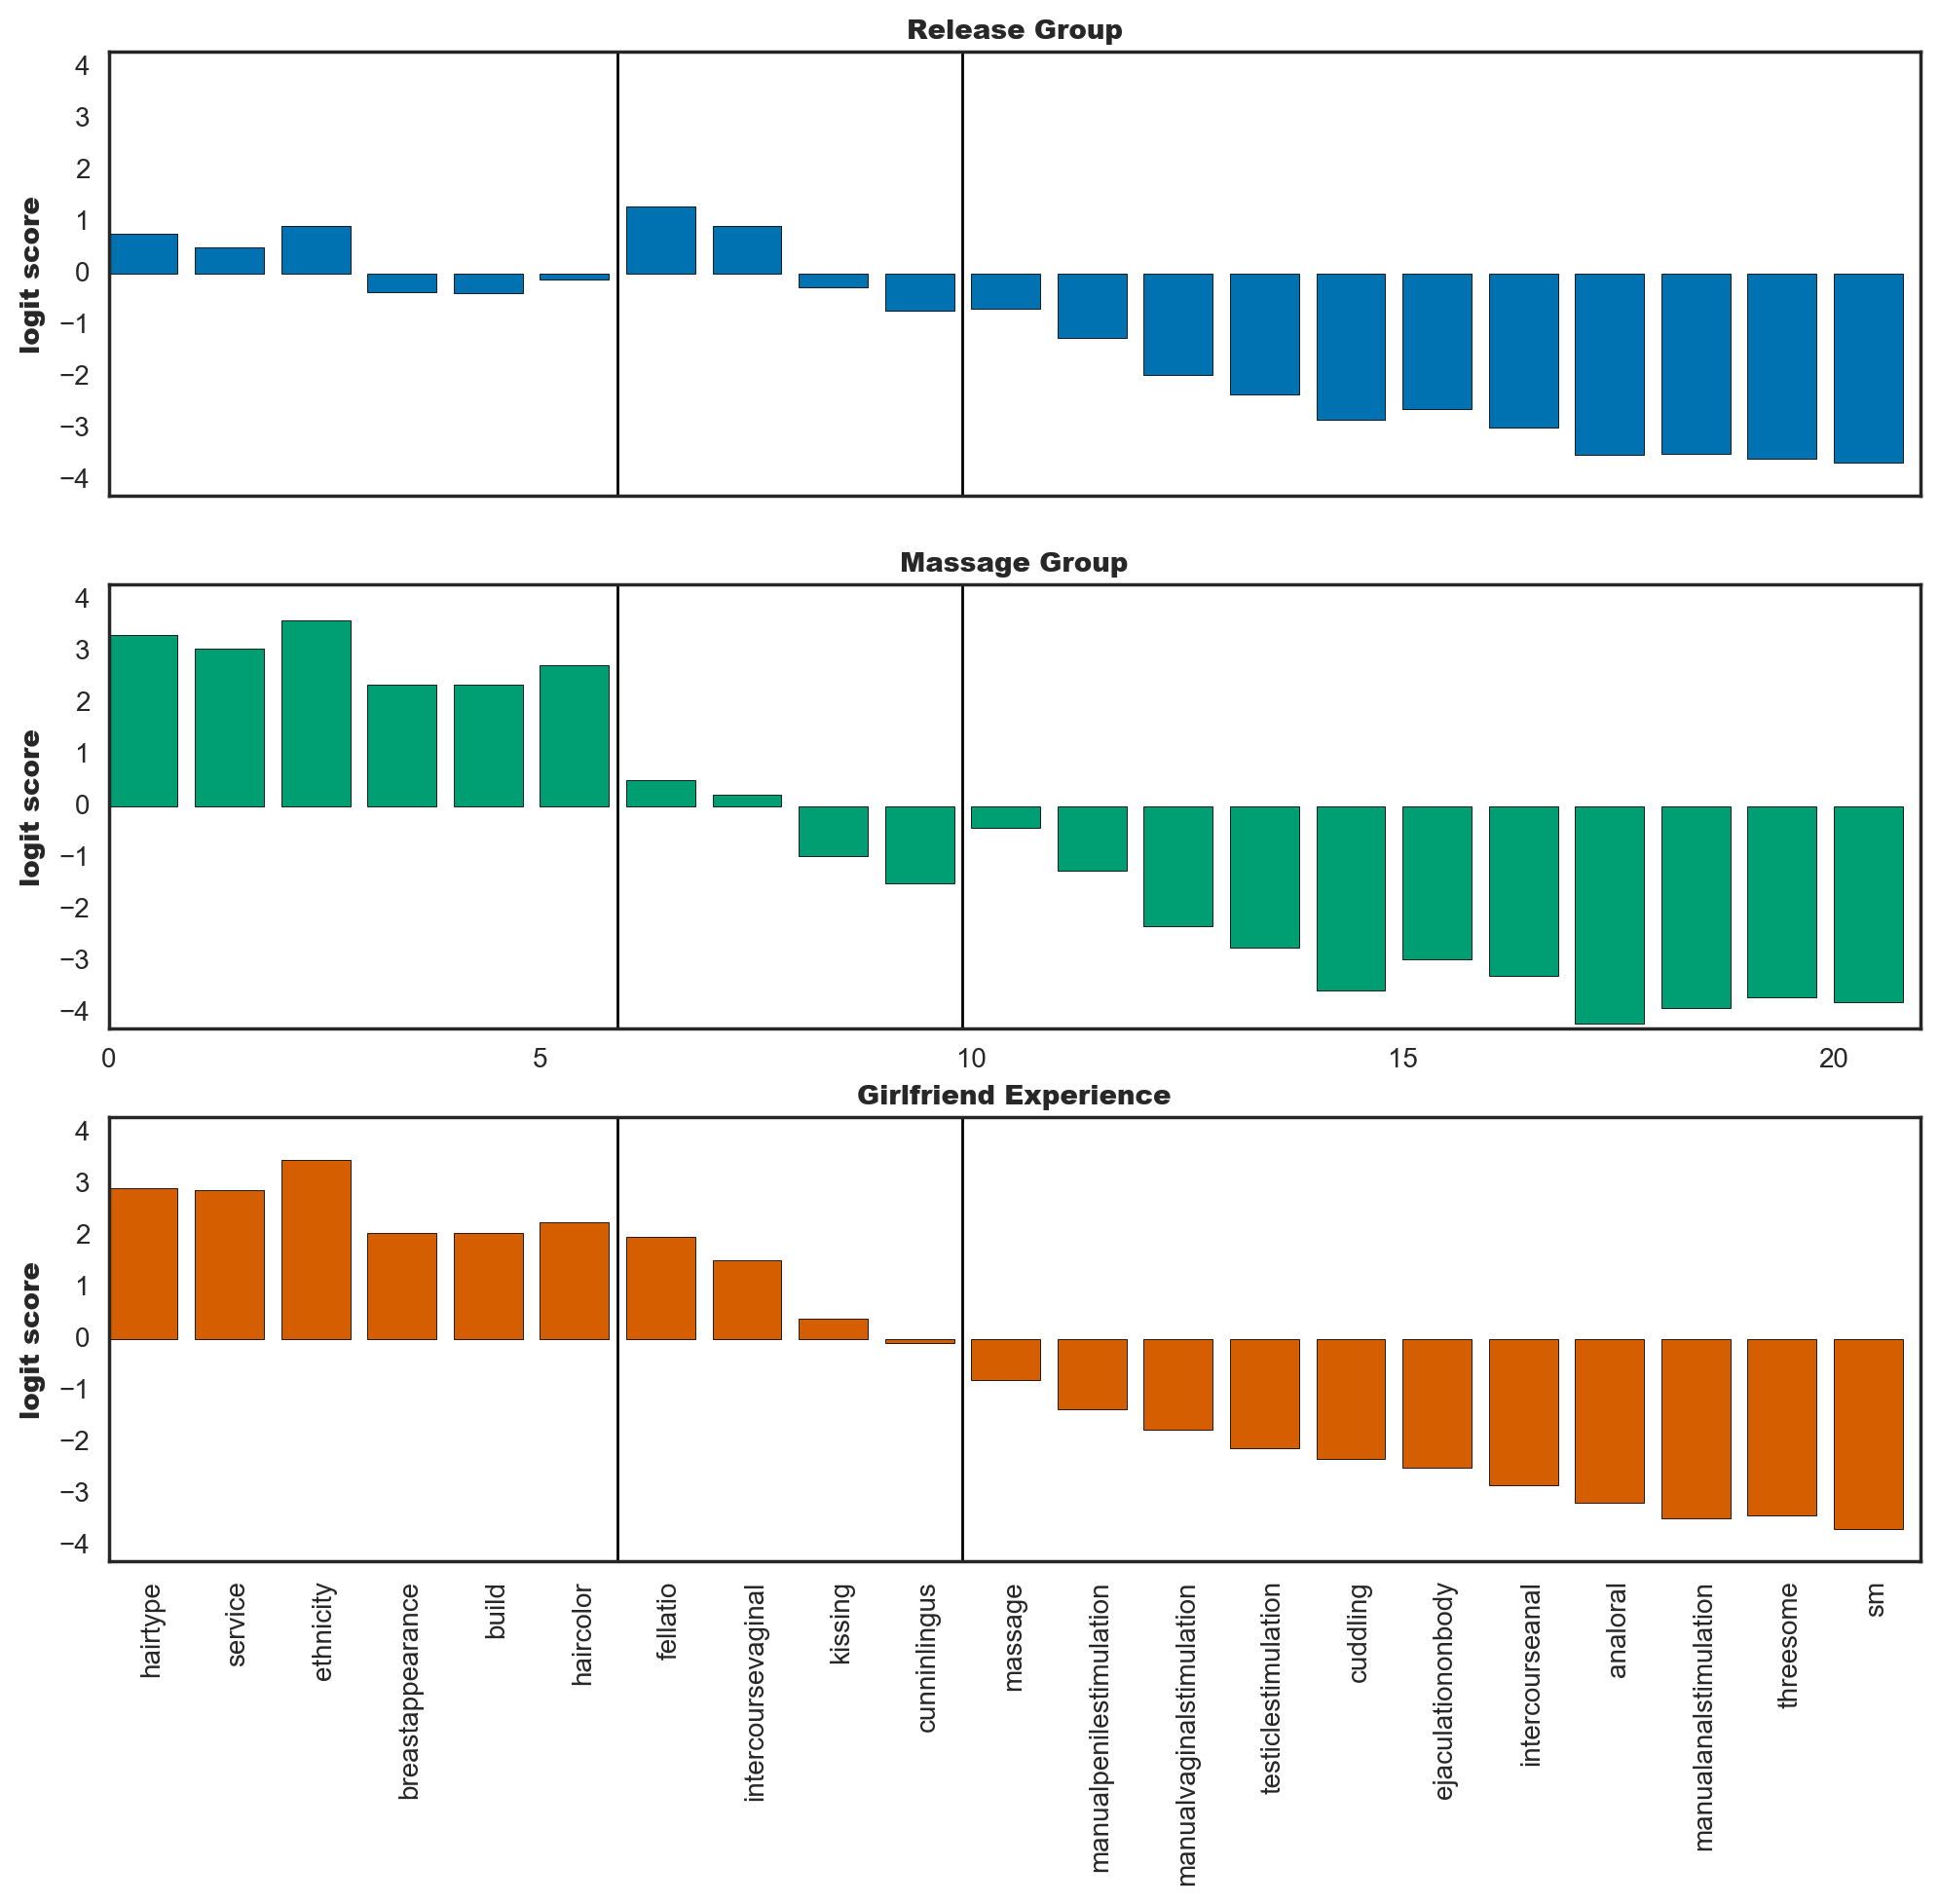

In [25]:
plt.figure(figsize=(12,10))

cb = sns.color_palette("colorblind",3)

#cntrs = np.exp(centers)/(1 + np.exp(centers)  )
cntrs = centers

ax = plt.subplot(3,1,1)
plt.title("Release Group",fontname="Arial Black",fontsize=10)
plt.bar(range(len(cntrs[0])), cntrs[0],color=cb[0] )
plt.axvline(x=5.9, ymin=0, ymax=1, color='black',linewidth=1)
plt.axvline(x=9.9, ymin=0, ymax=1, color='black',linewidth=1)

#plt.axhline(y=0.5, xmin=0, xmax=1, color = 'red', linewidth=1,linestyle='--')

plt.ylabel('logit score',fontname="Arial Black",fontsize=10)
ax.get_xaxis().set_visible(False)

plt.xlim(0,21)
#plt.ylim(0,1)
plt.ylim(-4.3,4.3)

plt.subplot(3,1,2)
plt.title("Massage Group",fontname="Arial Black",fontsize=10)
plt.bar(range(len(cntrs[1])), cntrs[1],color=cb[1] )
plt.axvline(x=5.9, ymin=0, ymax=1, color='black',linewidth=1)
plt.axvline(x=9.9, ymin=0, ymax=1, color='black',linewidth=1)
plt.ylabel('logit score',fontname="Arial Black",fontsize=10)
#plt.axhline(y=0.5, xmin=0, xmax=1, color = 'red', linewidth=1,linestyle='--')

plt.xlim(0,21)
#plt.ylim(0,1)
plt.ylim(-4.3,4.3)

ax = plt.subplot(3,1,3)
plt.title("Girlfriend Experience",fontname="Arial Black",fontsize=10)
plt.bar(np.arange(len(cntrs[2])), cntrs[2],color=cb[2] )
plt.axvline(x=5.9, ymin=0, ymax=1, color='black',linewidth=1)
plt.axvline(x=9.9, ymin=0, ymax=1, color='black',linewidth=1)
plt.ylabel('logit score',fontname="Arial Black",fontsize=10)

#plt.axhline(y=0.5, xmin=0, xmax=1, color = 'red', linewidth=1,linestyle='--')



plt.xlim(0,21)
#plt.ylim(0,1)
plt.ylim(-4.3,4.3)

plt.xticks(np.arange(len(cntrs[2]))+0.5,df_all.columns)

ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.show()

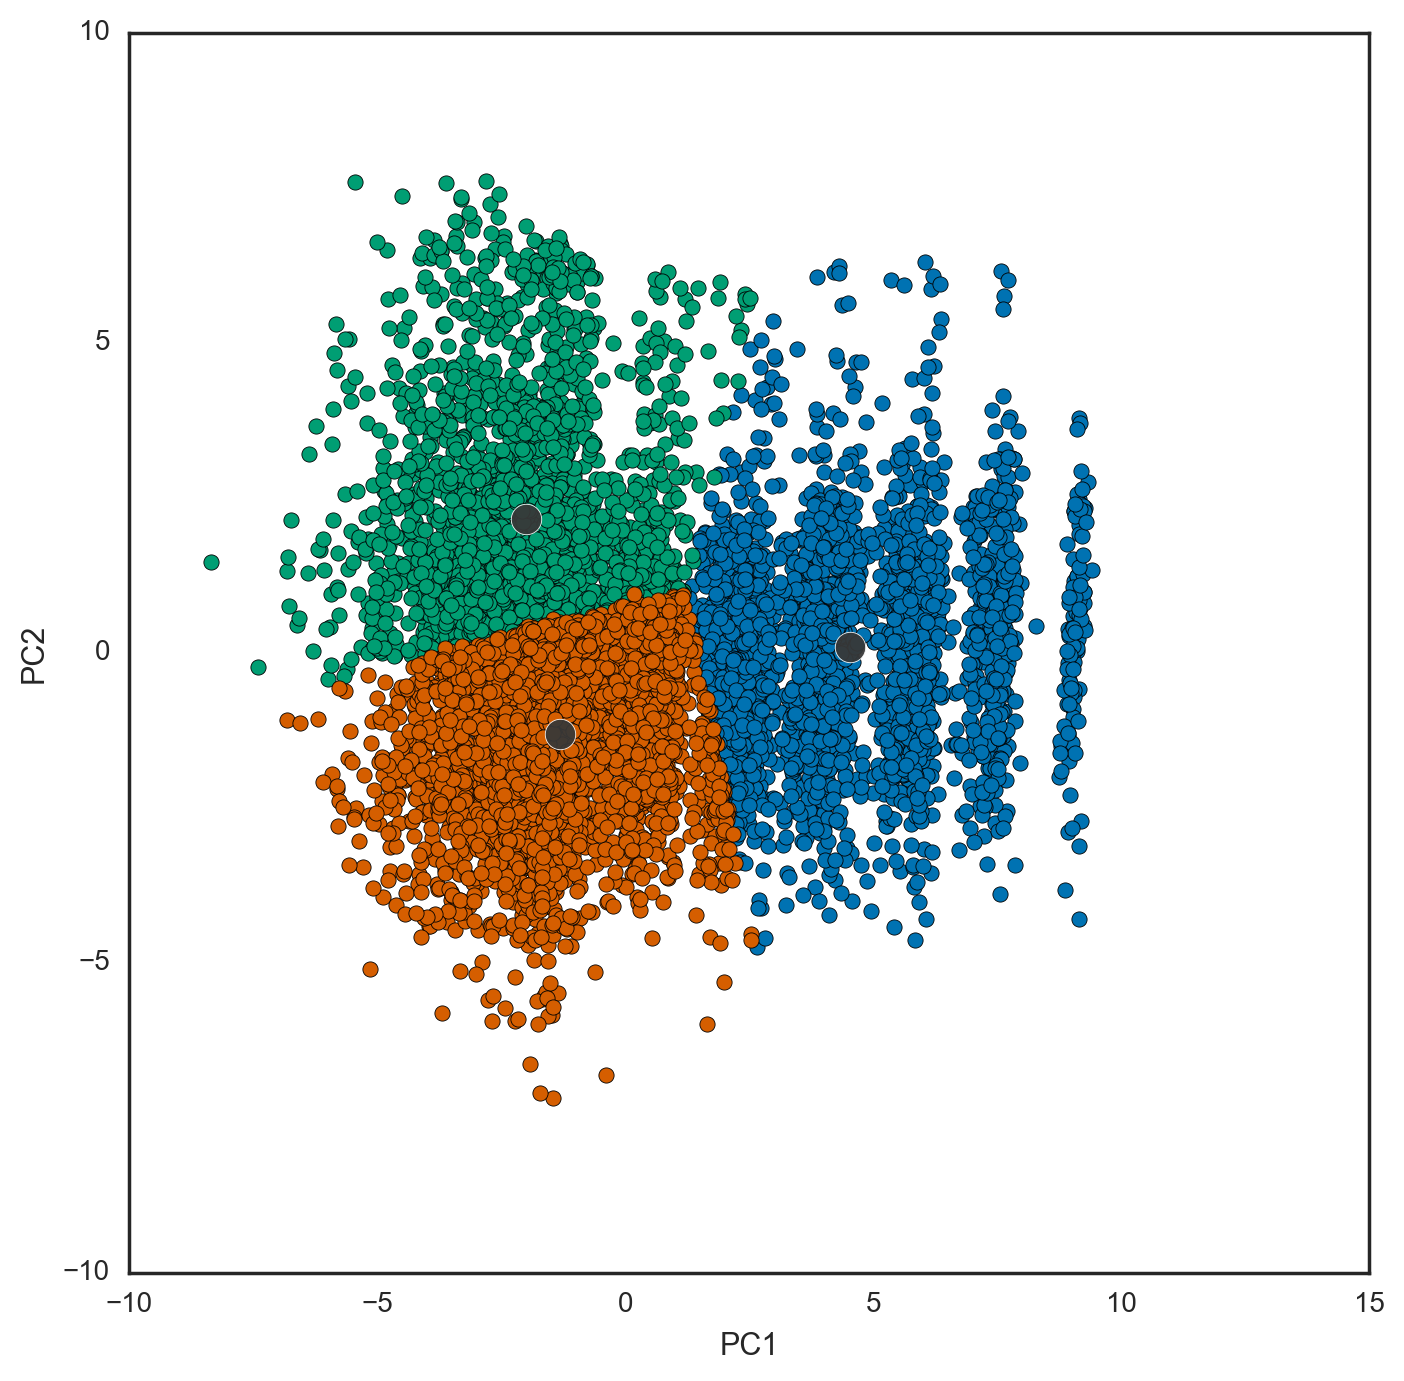

In [21]:
from kmeans.utilities import distortion, kmeans_plot
from kmeans.kmeans_stock import kmeans_stock

#blue ... cluster 0
#green ... cluster 1
#red-brown ... cluster 2

kmeans_plot(labels,
            centers,
            data)

In [19]:
centers2 = centers.copy()
centers2[[0,1],:]=0

In [15]:
centers2

array([[ 0.77895376,  0.51203394,  0.91722325, -0.36780689, -0.37651789,
        -0.10734897,  1.30678367,  0.92868012, -0.26940149, -0.7210057 ,
        -0.67310587, -1.24418917, -1.96986881, -2.33472344, -2.82757184,
        -2.62805209, -2.98424616, -3.5146563 , -3.49555163, -3.58205682,
        -3.65950212],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])